In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating tensors using tf.constant()

In [3]:
# creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# check the number of dimensions of a scalar (using ndim attribute)
scalar.ndim

0

In [13]:
# create a vector using tf.constant
v1 = tf.constant([1, 2, 3, 4, 5, 6])
v1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [14]:
v1.ndim

1

In [30]:
# create a vector with no elements in an array
v2 = tf.constant([])
v2

<tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>

In [31]:
v2.ndim

1

In [ ]:
shape=(6,)

In [24]:
# create a matrix
m1 = tf.constant([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
m1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [25]:
m1.ndim

2

In [26]:
# create a matrix with a different data type
m2 = tf.constant([[1., 2.],
                  [3., 4.]], dtype=tf.float16)
m2

<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float16)>

In [27]:
m2.ndim

2

In [28]:
# create a tensor
t1 = tf.constant([[[1., 2.], [3., 4.]],
                   [[5., 6.], [7., 8.]],
                  [[10., 11.], [12., 13.]]])
t1

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 5.,  6.],
        [ 7.,  8.]],

       [[10., 11.],
        [12., 13.]]], dtype=float32)>

In [29]:
t1.ndim

3

In [38]:
# learning all about the tensor t1
print("Type of every element:", t1.dtype)
print("Number of axes:", t1.ndim)
print("Shape of tensor:", t1.shape)
print("Elements along axis 0 of tensor:", t1.shape[0])
print("Elements along the last axis of tensor:", t1.shape[-1])
print("Total number of elements : ", tf.size(t1).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 3
Shape of tensor: (3, 2, 2)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 2
Total number of elements :  12


In [32]:
# does tf.constant generate an immutable vector
s2 = tf.constant(5)
s2

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [35]:
s2 = tf.constant(6)
s2

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [36]:
# a vector example
v3 = tf.constant([1, 2, 3])
v3

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [40]:
# for further analysis
v3[1]= 5
v3

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## Creating tensors using tf.Variable()

In [41]:
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])

In [42]:
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

In [43]:
unchangeable_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>

In [44]:
# change an element in the changeable tensor
changeable_tensor[1] = 5

TypeError: 'ResourceVariable' object does not support item assignment

In [45]:
# using assign function
changeable_tensor[1].assign(5)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  5], dtype=int32)>

In [46]:
# applying similar method for the unchangeable tensor
unchangeable_tensor[1].assign(5)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## Creating a Random Tensor

In [58]:
'''
Encountered error
NotFoundError: No registered 'RngReadAndSkip' OpKernel for 'GPU' devices compatible with node {{node RngReadAndSkip}}
	.  Registered:  device='CPU'
 [Op:RngReadAndSkip]

 As per stackoverflow
 https://stackoverflow.com/questions/69088577/apple-m1-i-got-no-registered-rngreadandskip-opkernel-for-gpu-devices-comp


 It happens because some TF/Keras high-level methods are not implemented in tensorflow-metal. You can try this workaround:

with tf.device('/cpu:0'):
    ...  # your code which need RngReadAndSkip low-level method here
And next you can do other stuff normally (with GPU).

Hope, Apple will fix it someday (and their another tons of bugs too, lmao)
'''

with tf.device('/cpu:0'):
    random_1 = tf.random.Generator.from_seed(42)
    random_1 = random_1.normal(shape=(1000, ), mean = 0, stddev=1.0)
    print(random_1)

tf.Tensor(
[-0.7565803  -0.06854702  0.07595026 -1.2573844  -0.23193763 -1.8107855
  0.09988727 -0.50998646 -0.7535805  -0.57166284  0.1480774  -0.23362993
 -0.3522796   0.40621263 -1.0523509   1.2054597   1.6874489  -0.4462975
 -2.3410842   0.99009085 -0.0876323  -0.635568   -0.6161736  -1.9441465
 -0.48293006 -0.52447474 -1.0345329   1.3066901  -1.5184573  -0.4585211
  0.5714663  -1.5331722   0.45331386  1.1487608  -1.2659091  -0.47450137
  2.006022    0.28288034 -0.30288252 -1.443651    1.0034493   0.20857747
  0.35700995  1.0648885   1.2432485  -2.2173238   0.18706243  0.6617961
  0.01380118 -0.24827152  1.2111493  -0.7199124  -0.04082382  2.6791053
  1.0914806   0.33149615 -0.67958915  0.44723678 -0.17811584  0.24882518
  0.49689844  0.8259971   1.0340209  -0.24918637 -1.5780283  -0.92161775
  0.268676    0.9418312  -0.9465717  -0.7108357   1.2995545  -0.6149066
 -1.4713507  -0.10086866  0.9603877  -1.6370124   0.17664973 -0.67038715
 -0.503455   -1.203792   -2.5255601   0.0508094

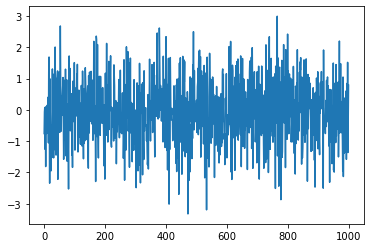

In [59]:
import matplotlib.pyplot as plt
plt.plot(random_1)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.3228774 , -2.6915877 , -2.060298  , -1.4290081 , -0.79771835,
        -0.16642857,  0.4648612 ,  1.096151  ,  1.7274407 ,  2.3587306 ,
         2.9900203 ], dtype=float32),
 <a list of 1000 BarContainer objects>)

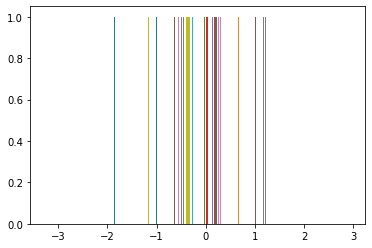

In [60]:
plt.hist(random_1, bins=10)

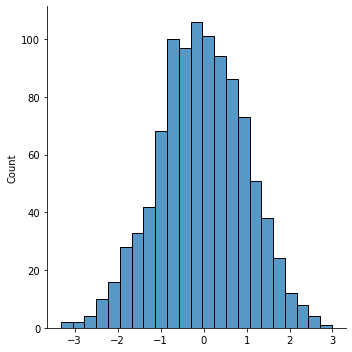

In [61]:
import seaborn as sns
sns.displot(random_1)

<AxesSubplot:ylabel='Density'>

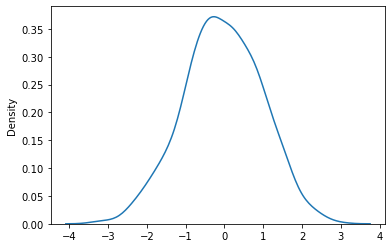

In [62]:
sns.kdeplot(random_1)

In [70]:
# checking if two random tensors created using normal function are same
with tf.device('/cpu:0'):
    random_seed = tf.random.Generator.from_seed(42)
    random_1 = random_seed.normal(shape=(3,2), mean = 0, stddev=1.0)
    random_2 = random_seed.normal(shape=(3,2), mean = 0, stddev=1.0)
    print(random_1, random_2, random_1 == random_2)

tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32) tf.Tensor(
[[ 0.17522676  0.71105534]
 [ 0.54882437  0.14896014]
 [-0.54757965  0.61634356]], shape=(3, 2), dtype=float32) tf.Tensor(
[[False False]
 [False False]
 [False False]], shape=(3, 2), dtype=bool)


Seems like sharing the same random generator is not deterministic and requires reseting once a random generation has occured.

In [73]:
with tf.device('/cpu:0'):
    random_1 = tf.random.Generator.from_seed(42)
    random_1 = random_1.normal(shape=(3,2))
    random_2 = tf.random.Generator.from_seed(42)
    random_2 = random_2.normal(shape=(3,2))
    print(random_1, random_2, random_1 == random_2)

tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32) tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32) tf.Tensor(
[[ True  True]
 [ True  True]
 [ True  True]], shape=(3, 2), dtype=bool)


In [77]:
with tf.device('/cpu:0'):
    tf.random.set_seed(42)
    random_1 = tf.random.normal(shape=(3,2), mean=0.0, stddev=1.0, dtype=tf.float16, seed=42)
    tf.random.set_seed(42)
    random_2 = tf.random.normal(shape=(3,2), mean=0.0, stddev=1.0, dtype=tf.float16, seed=42)
    print(random_1, random_2, random_1 == random_2)

tf.Tensor(
[[ 1.314   -0.1542 ]
 [ 0.9116  -0.7993 ]
 [-0.10876  0.2844 ]], shape=(3, 2), dtype=float16) tf.Tensor(
[[ 1.314   -0.1542 ]
 [ 0.9116  -0.7993 ]
 [-0.10876  0.2844 ]], shape=(3, 2), dtype=float16) tf.Tensor(
[[ True  True]
 [ True  True]
 [ True  True]], shape=(3, 2), dtype=bool)


## Shuffling the order of the tensor randomly

In [78]:
t1 = tf.constant([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15],
                  [16, 17, 18]])

In [79]:
tf.random.set_seed(42)
tf.random.shuffle(t1, seed=42)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[10, 11, 12],
       [13, 14, 15],
       [ 4,  5,  6],
       [16, 17, 18],
       [ 7,  8,  9],
       [ 1,  2,  3]], dtype=int32)>

In [82]:
tf.random.set_seed(42)
tf.random.shuffle(t1, seed=42)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[10, 11, 12],
       [13, 14, 15],
       [ 4,  5,  6],
       [16, 17, 18],
       [ 7,  8,  9],
       [ 1,  2,  3]], dtype=int32)>

## Creating tensors from numpy array

In [83]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)